In [ ]:
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SpatialDropout1D
from tensorflow import keras
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
plt.style.use('fivethirtyeight')

In [ ]:
#df = web.DataReader('^JKSE', data_source='yahoo', start = '2018-01-06', end = '2020-10-06')
df = web.DataReader('BBCA.JK', data_source='yahoo', start = '2018-01-15', end = '2020-10-15')

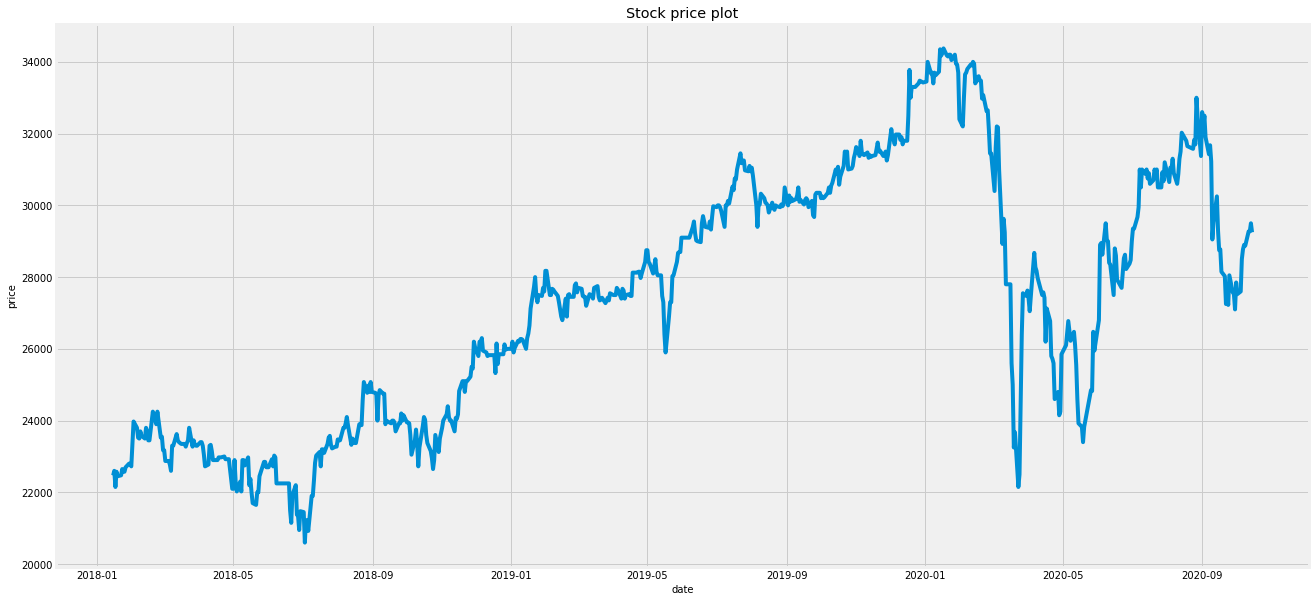

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Stock price plot')
#plt.plot(df['Open'])
plt.plot(df['Close'])
plt.xlabel('date', fontsize = 10)
plt.ylabel('price', fontsize = 10)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = len(dataset) #642

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset) #scaled_data.shape = (642, 1)

In [ ]:
h = 80 #Jumlah test
inp = 40 #Besar input

train_data = scaled_data[0:training_data_len-h-inp,:] #0 sampai 582, train_data.shape = (582,1)
x_train = []
y_train = []
for i in range(inp, len(train_data)): #len(train_data) = 582, i = 60 sampai 581
  x_train.append(train_data[i-inp:i, 0])
  y_train.append(train_data[i, 0])
  #if i<=60:
  #  print(x_train)
  #  print(y_train)

In [ ]:
df.shape

(701, 6)

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train) #x_train.shape = (522, 60), y_train.shape = (522,)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #x_train.shape = (522, 60, 1)

In [ ]:
learning_rate = 0.003
epoch=7

model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_rate), loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=epoch)

Epoch 1/7
543/543 [==============================] - 10s 18ms/step - loss: 0.0128
Epoch 2/7
543/543 [==============================] - 10s 18ms/step - loss: 0.0072
Epoch 3/7
543/543 [==============================] - 10s 18ms/step - loss: 0.0070
Epoch 4/7
543/543 [==============================] - 10s 18ms/step - loss: 0.0045
Epoch 5/7
543/543 [==============================] - 11s 19ms/step - loss: 0.0046
Epoch 6/7
543/543 [==============================] - 10s 19ms/step - loss: 0.0053
Epoch 7/7
543/543 [==============================] - 10s 19ms/step - loss: 0.0040


In [ ]:
test_data = scaled_data[training_data_len-(inp+h):training_data_len,:] #522 sampai 642, test_data.shape = (60, 1)
x_test = []
y_test = []
for i in range(inp, len(test_data)):
  x_test.append(test_data[i-inp:i, 0])
  y_test.append(train_data[i, 0])

In [ ]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
print('r2_score: ',r2_score(y_test, predictions))
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions,squared=True))
print('rmse: ',mean_squared_error(y_test, predictions,squared=False))
predictions = scaler.inverse_transform(predictions)
#predictions[:,0]

r2_score:  -124.33323513394726
MAE:  0.4992438429300613
MSE:  0.261266854418314
rmse:  0.5111426947715423


In [ ]:
predictions[-1]

array([28784.133], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


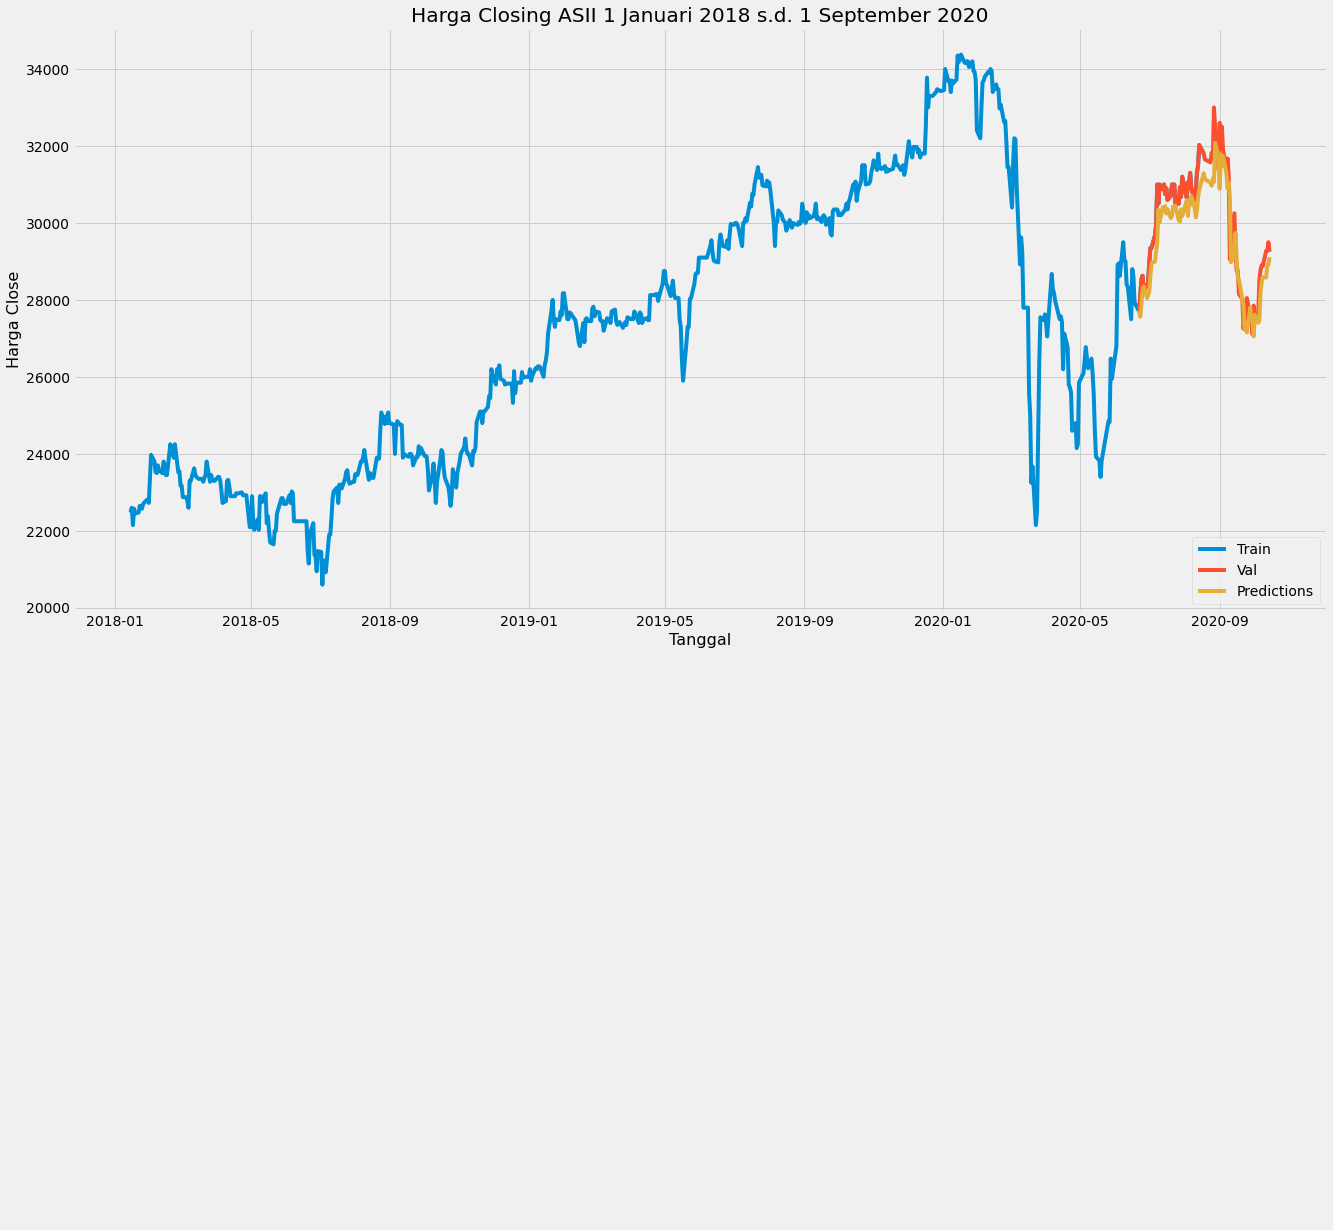

In [ ]:
train = data[:training_data_len-inp]
valid = data[training_data_len-h:training_data_len]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Harga Closing ASII 1 Januari 2018 s.d. 1 September 2020')
plt.xlabel('Tanggal', fontsize = 16 )
plt.ylabel('Harga Close', fontsize = 16 )
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
x = pd.to_datetime('2018/02/01', format='%Y/%m/%d')
str1 = 'Learning rate: {}'.format(learning_rate)
str2 = 'Epoch: {}'.format(epoch)
plt.annotate(str1, (x,4200), (x,4200), fontsize=12)
plt.annotate(str2, (x,4100), (x,4100), fontsize=12)
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [ ]:
hari = int(input("Jumlah hari: "))
data_pred = scaled_data[training_data_len-inp:training_data_len,:] #60 nilai terakhir dari dataset
for i in range(0,hari):
  x_pred = np.vstack(data_pred[i:i+inp, 0])
  x_pred = np.array(x_pred)
  x_pred = np.reshape(x_pred, (x_pred.shape[1], x_pred.shape[0], 1))
  predict = model.predict(x_pred)
  data_pred = np.vstack((data_pred, predict))

Jumlah hari: 14


In [ ]:
data_pred.shape

(54, 1)

[[30334.85527188]
 [30971.3264659 ]
 [31677.34996378]
 [32417.20581204]
 [33184.28616822]
 [33974.05553013]
 [34781.78955317]
 [35602.14071274]
 [36429.06194627]
 [37255.92406392]
 [38075.74974895]
 [38881.51242137]
 [39666.43510163]
 [40424.26956892]]


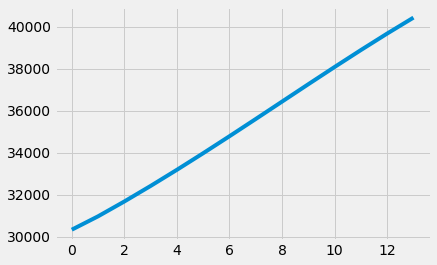

In [ ]:
hasil_prediksi = data_pred[len(data_pred)-hari:len(data_pred),:]
hasil_prediksi = scaler.inverse_transform(hasil_prediksi)
print(hasil_prediksi) #Hasil prediksi
plt.plot(hasil_prediksi)

#TRAINING WITH FULL DATASET

In [ ]:
new_train_data = scaled_data[0:training_data_len,:] 
new_x_train = []
new_y_train = []
for i in range(inp, len(new_train_data)): 
  new_x_train.append(new_train_data[i-inp:i, 0])
  new_y_train.append(new_train_data[i, 0])
new_x_train, new_y_train = np.array(new_x_train), np.array(new_y_train) #x_train.shape = (522, 60), y_train.shape = (522,)
new_x_train = np.reshape(new_x_train, (new_x_train.shape[0], new_x_train.shape[1], 1)) #x_train.shape = (522, 60, 1)
new_model = Sequential()
new_model.add(LSTM(60, return_sequences=True, input_shape=(new_x_train.shape[1], 1)))
new_model.add(LSTM(100, return_sequences=False))
new_model.add(Dropout(0.4))
new_model.add(Dense(25))
new_model.add(Dense(1))
new_model.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_rate), loss = 'mean_squared_error')
new_model.fit(x_train, y_train, batch_size=1, epochs=epoch)

Epoch 1/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0144
Epoch 2/6
541/541 [==============================] - 12s 23ms/step - loss: 0.0077
Epoch 3/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0064
Epoch 4/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0050
Epoch 5/6
541/541 [==============================] - 12s 23ms/step - loss: 0.0052
Epoch 6/6
541/541 [==============================] - 13s 23ms/step - loss: 0.0044


In [ ]:
hari = int(input("Jumlah hari: "))
data_pred = scaled_data[training_data_len-inp:training_data_len,:] #60 nilai terakhir dari dataset
for i in range(0,hari):
  x_pred = np.vstack(data_pred[i:i+inp, 0])
  x_pred = np.array(x_pred)
  x_pred = np.reshape(x_pred, (x_pred.shape[1], x_pred.shape[0], 1))
  predict = new_model.predict(x_pred)
  data_pred = np.vstack((data_pred, predict))

Jumlah hari: 14


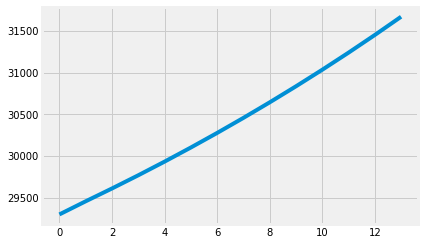

In [ ]:
hasil_prediksi = data_pred[len(data_pred)-hari:len(data_pred),:]
hasil_prediksi = scaler.inverse_transform(hasil_prediksi)
#print(hasil_prediksi) #Hasil prediksi
plt.plot(hasil_prediksi)